# **Proyecto 1**
**Sebastián González Juárez**

Crea un programa que ejecute cualquier estado genérico donde se obtenga:

1. El operador de densidad de dicho estado, y
2. confirme si cumple la condición de normalización.


## Paqueterías

In [1]:
!pip install qiskit

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from IPython.display import display
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

0. Crear un estado cuántico genérico

In [3]:
# Usare amplitudes complejas alatorias.
alpha = np.random.rand() + 1j * np.random.rand()
beta = np.random.rand() + 1j * np.random.rand()

# Para cumplir las amplitudes en un estado, deben estar normalizadas.
norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
alpha /= norm
beta /= norm

# Ahora tenemos el estado como vector columna |psi>
psi = (np.array([[alpha], [beta]]))
print("Estado generado |psi>:\n", psi)
print()
print(f"alpha = {alpha}")
print(f"beta  = {beta}")
print(f"normalización = {norm}")

Estado generado |psi>:
 [[0.03430591+0.2457503j ]
 [0.13223485+0.95965819j]]

alpha = (0.034305906723004743+0.24575030412936855j)
beta  = (0.13223485126451695+0.9596581875310011j)
normalización = 0.6458124865570595



Circuito cuántico:
   ┌────────────────────────────────────────────────┐
q: ┤ Initialize(0.034306+0.24575j,0.13223+0.95966j) ├
   └────────────────────────────────────────────────┘

Representación en esfera de Bloch del estado |ψ>:


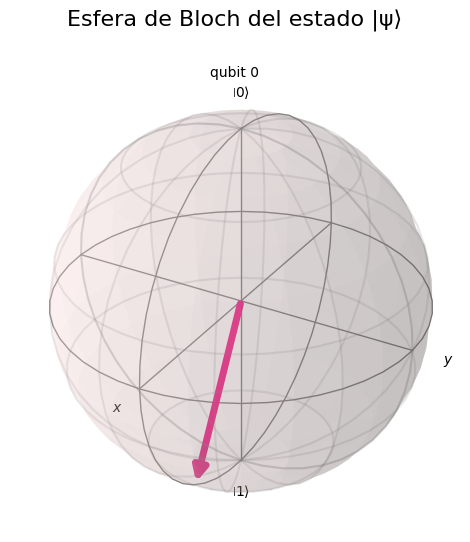

In [4]:
# Crearé el estado solo para verlo y mostrarlo
qc = QuantumCircuit(1)
qc.initialize([alpha, beta], 0)
print("\nCircuito cuántico:")
print(qc)
print("\nRepresentación en esfera de Bloch del estado |ψ>:")
psi_1 = Statevector.from_instruction(qc)
display(plot_bloch_multivector(psi_1, title="Esfera de Bloch del estado |ψ⟩"))

## 1. Calcular operador de densidad |psi><psi|

In [5]:
rho = psi @ psi.conj().T  # |psi><psi|

**Explicación de:** rho = psi @ psi.conj().T

El vector $(\psi)$ es un **vector columna** que representa el estado cuántico $|\psi\rangle$.
$|\psi\rangle =
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$

La operación \(\psi.conj().T\) significa:
- `.conj()` → tomar el **conjugado complejo** del vector (para obtener \(\langle \psi|\)).
- `.T` → transponer (convertir vector columna en vector fila).

$\langle \psi| =
\begin{bmatrix}
\alpha^* & \beta^*
\end{bmatrix} $


El símbolo `@` en Python (NumPy) indica **producto matricial**.

Entonces:
$\
\rho = |\psi\rangle \langle \psi| =
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
\begin{bmatrix}
\alpha^* & \beta^*
\end{bmatrix}
=
\begin{bmatrix}
|\alpha|^2 & \alpha\beta^* \\
\beta\alpha^* & |\beta|^2
\end{bmatrix}
$

Esto es exactamente el **operador de densidad** para un **estado puro**.


In [6]:
print("\nOperador de densidad ρ:\n", rho)


Operador de densidad ρ:
 [[0.06157011+0.j         0.24037273-0.00042519j]
 [0.24037273+0.00042519j 0.93842989+0.j        ]]


2. Verificar propiedades.

In [7]:
# Verificar Hermiticidad
es_hermitico = np.allclose(rho, rho.conj().T)

# Verificar normalización (Tr(rho) = 1)
traza = np.trace(rho)
normalizado = np.isclose(traza, 1.0)

# Resultados:
print(" Verificación del operador de densidad")
print(f"Hermiticidad: {es_hermitico}")
print(f"Traza: {traza}")
print(f"Normalizado (Tr(rho) = 1): {normalizado}")

 Verificación del operador de densidad
Hermiticidad: True
Traza: (0.9999999999999996+0j)
Normalizado (Tr(rho) = 1): True
